In [1]:
import pandas as pd
import imageio
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from imageio import imread
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from skimage import feature

## The Dataset 

The dataset selected for this project is a fragment of the dataset made available by a research provided by the IET (Institute of Engineering and Technology).

The original dataset contains several images of in-match events taken from frames of TV transmission of the fixtures. The situations portrayed as samples can be several: frre-kick angle, card showed by refferee to a player, goal celebrations, amongst many others.

This study has interest only in wide pictures of players distributed through the pitch. Due to that, the complete dataset of the study were refined to mantain only images where tactical information could be potentially extracted, i.e., the dataset used has only images of wide range taken when the ball was inside the pitch and a significant amount of players is shown.

An example below will show the common behavior in the dataset images.

In [18]:
input_image = imageio.imread('./IAUSD Dataset/19.jpg') 

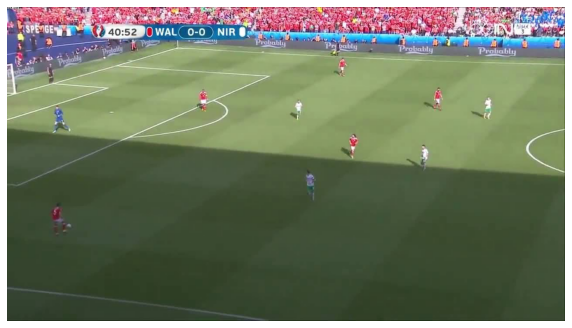

In [19]:
# plot of original image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(input_image)


The images are colored, so there will be preprocessing to convert the image into the greyscale.

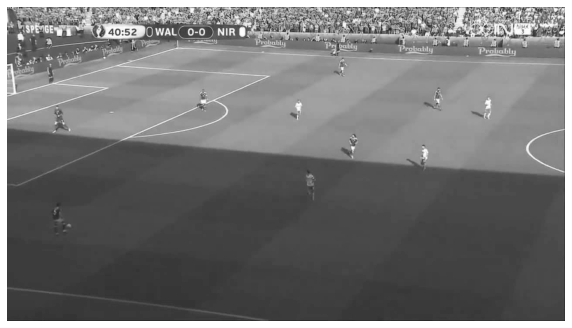

In [20]:
# greyscale preprocessing

input_image = input_image.astype(float)
input_image = input_image[:,:,0]*0.3 + input_image[:,:,1]*0.59 + input_image[:,:,2]*0.11
input_image = input_image.astype(np.uint8)

# normalization
img_min = np.min(input_image)
img_max = np.max(input_image)
if (img_max - img_min != 0):
    input_image = (input_image - img_min)/(img_max-img_min)
    
# result
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(input_image, cmap = plt.get_cmap(name = 'gray'))

After that, the Bag of Features is applied to obtain the descriptors.

The division strategy is to fit a player into the "texton". By this, patches would be 24x12, representing a rectangular shape that must contain the player. With this configuration, it must have a total of 3200 patches in the input image. 

(-0.5, 47.5, 95.5, -0.5)

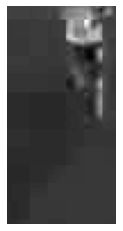

In [40]:
# separating image parts
patches = extract_patches_2d(input_image, 
                           patch_size=(96,48),
                           max_patches=3200, 
                           random_state=0)

# example of patch generated
plt.imshow(patches[190], cmap = plt.get_cmap(name = 'gray'))
plt.axis('off')

By this example of patch, it is possible to refine and find specific framing to get player as one of the image descriptors. This is the following step of the bag of features analysis 

In [43]:
lbp = feature.local_binary_pattern(input_image, 8, 1, method="uniform")

(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))

hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)

In [44]:
hist

array([0.00881836, 0.0208214 , 0.01102865, 0.0420638 , 0.06521267,
       0.17196398, 0.02611762, 0.02647786, 0.57353624, 0.05395942])

Until now histogram is not conclusive.